# Exercise 8

In [43]:
from wordcloud import WordCloud
import numpy as np
import nltk
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         # From the Pillow library import the Image module.
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maraf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maraf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maraf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
!pip install wordcloud

In [45]:


f = open("./book_three_little_pigs.txt",'r',encoding='UTF8')
my_book = f.readlines()

f.close()

In [46]:
n_min = 4                                                           # Minimum number of characters. 
corpus = []
lemmatizer = WordNetLemmatizer()
for a_line in my_book:
    pre = re.sub(r'\W', ' ', a_line)                                # Substitute the non-alphanumerics character by space.
    pre = re.sub(r'\d+','', pre)                                    # Remove numbers.
    pre = nltk.word_tokenize(pre)                                   # Tokenize into words.
    pre = [x for x in pre if len(x) > n_min]                        # Minimum length.
    pre = [x.lower() for x in pre]                                  # Convert into the lowercase.
    pre = [x for x in pre if x not in stopwords.words('english')]   # Remove stopwords.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # Lemmatize.
    corpus += pre                                                   # Back to the corpus.

In [47]:
len(corpus)

184

In [48]:
a_long_sentence = ' '.join(corpus)



In [49]:
wc = WordCloud(background_color='white', max_words=30)              # Customize the output.
wc.generate(a_long_sentence)
# wc.words_                                                          # Check for the top ranking words. 

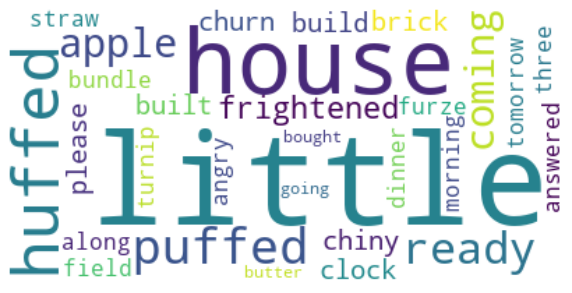

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.show()

In [52]:
# Pick a background mask.
#img = Image.open('background_1.png')                    # Elipse.
#img = Image.open('background_2.png')                   # Speech bubble.
img = Image.open('background_3.png')                    # Heart.
#img = Image.open('background_4.png')                    # Circle.
back_mask = np.array(img)

In [53]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # Customize the output. 
wc.generate(a_long_sentence) 

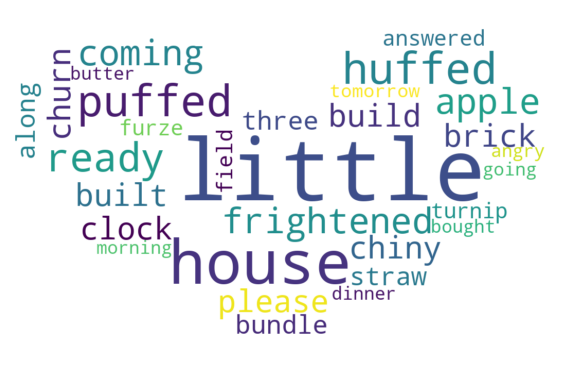

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.savefig("out.png")                             # Save to an external file.  
plt.show()

## Exercise 9

In [55]:
import nltk
from numpy.random import randint, seed
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
# Text data for training.
my_text = """Machine learning is the scientific study of algorithms and statistical models that computer systems use to effectively perform a specific task without using explicit instructions, relying on patterns and inference instead. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model of sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.[1][2]:2 Machine learning algorithms are used in the applications of email filtering, detection of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a field of study within machine learning, and focuses on exploratory data analysis through unsupervised learning In its application across business problems, machine learning is also referred to as predictive analytics."""

In [57]:
my_test = [my_text.lower()]

In [58]:
n = 3                                                            # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = 'word'                                             # n-Gram with words.
vectorizer = CountVectorizer(ngram_range=(n_min,n_max), analyzer = n_gram_type)

In [59]:
n_grams = vectorizer.fit(my_text).get_feature_names()            # Get the n-Grams as a list.
n_gram_cts = vectorizer.transform(my_text).toarray()             #  The output is an array of array.
n_gram_cts = list(n_gram_cts[0])                                 # Convert into a simple list.

ValueError: Iterable over raw text documents expected, string object received.

In [ ]:
list(zip(n_grams,n_gram_cts))                                    # Make a list of tuples and show.